In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# Step1. 一定要留出驗證資料
from sklearn.model_selection import train_test_split
# [90% iris["data"], 10% iris["data"], 90% iris["target"], 10% iris["target"]]
x_train, x_test, y_train, y_test = train_test_split(iris["data"],
                                                    iris["target"],
                                                    test_size=0.1)

In [3]:
# Step2. 讓演算法去學習訓練資料
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
# 學習: fit
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [4]:
# Step3. 讓學完的方程式去跟驗證資料看一個好壞
from sklearn.metrics import accuracy_score
# 預測: predict
pre = clf.predict(x_test)
print("預測結果:", pre)
print("正確率:", accuracy_score(pre, y_test))

預測結果: [2 0 2 2 0 0 2 2 0 2 1 2 1 0 1]
正確率: 0.9333333333333333


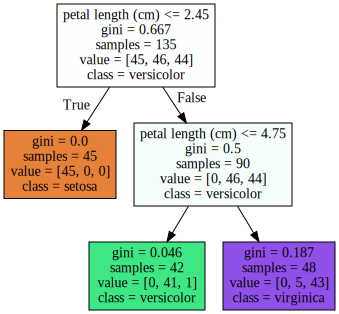

In [5]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf, 
                    feature_names=iris["feature_names"],
                    class_names=iris["target_names"],
                    filled=True)
graphviz.Source(g)